This script is the repostiry's main feature. 

Inputs are defined in the cell below.

Outputs are:
- TS and TH printed for each chosen method
- saved to out folder:
    - results.xlsx
    - Delta.png
    - Delta_boxplot.png
    - TH.png
    - TS.png

In [1]:
# Define input variables

in_dir = "../Raw Data/Applied Acoustics/"
#methods = ["beamforming", "pseudo_intensity", "allrad_decoder", "allrad2_decoder", "mad_decoder", "reference"]
methods = ["beamforming", "pseudo_intensity", "reference"]
evaluation_start_ms = 15
evaluation_stop_ms = 100
samplerate = 44100

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from method_wrapper import method_wrapper

In [3]:
# sort folders
folders = sorted(os.listdir(in_dir))
# remove hidden folders
folders = [folder for folder in folders if '.' not in folder]



# create empty Dataframes to store results in
TS_results = pd.DataFrame()
TH_results = pd.DataFrame()
delta_results = pd.DataFrame()



# iterate through folders and methods
for folder in folders:
    print(folder)
    path = in_dir + folder + "/HOA/"
    print(path)
    for method in methods:
        try:
            TS, TH = method_wrapper(method, path, start_milliseconds = evaluation_start_ms, stop_milliseconds=evaluation_stop_ms, samplerate=samplerate)
            print(method, "TS:", TS, "TH:", TH)
        except:
            print(method, "not working")
            TS = None
            TH = None

        # save data
        TS_results.loc[folder, method] = TS
        TH_results.loc[folder, method] = TH
        try:
            delta_results.loc[folder, method] = TS - TH

        except:
            delta_results.loc[folder, method] = None


    print("")

A10p
../Raw Data/Applied Acoustics/A10p/HOA/
[[ 0.00000000e+00 -5.17368317e-05 -2.75373459e-05 ... -1.19209290e-07
  -1.19209290e-07 -1.19209290e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  5.76972961e-05  3.06367874e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00135803e-04 -5.31673431e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
beamforming TS: -15.515021342219335 TH: -16.763359379682452
pseudo_intensity TS: 23.677126633697597 TH: 24.718584542743503
reference TS: -8.860272589975782 TH: -9.541460614300224

A11p
../Raw Data/Applied Acoustics/A11p/HOA/
[[ 0.00000000e+00 -5.17368317e-05 -2.75373459e-05 ...  0.00000000e+00
   0.00000000e+00  0.000

In [4]:
# create out folder
os.makedirs("../out", exist_ok=True)

# write dataframe to excel
with pd.ExcelWriter('../out/results.xlsx', engine='openpyxl') as writer:
    TS_results.to_excel(writer, sheet_name='TS')
    TH_results.to_excel(writer, sheet_name='TH')
    delta_results.to_excel(writer, sheet_name='delta')

ModuleNotFoundError: No module named 'openpyxl'

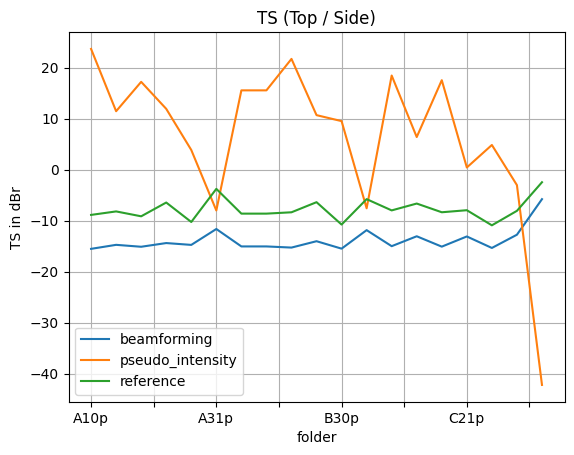

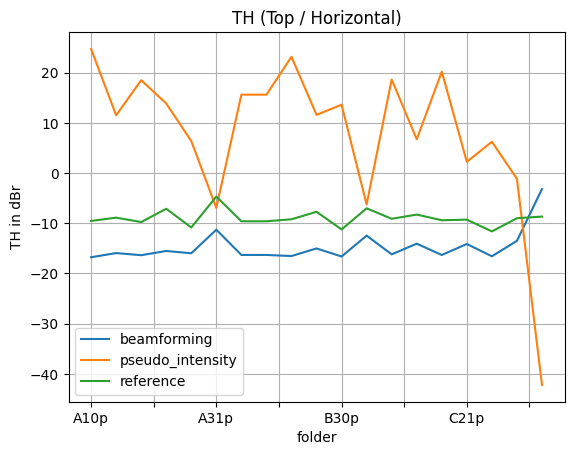

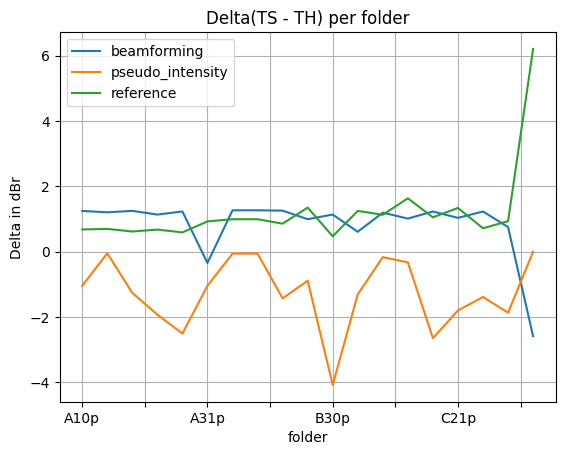

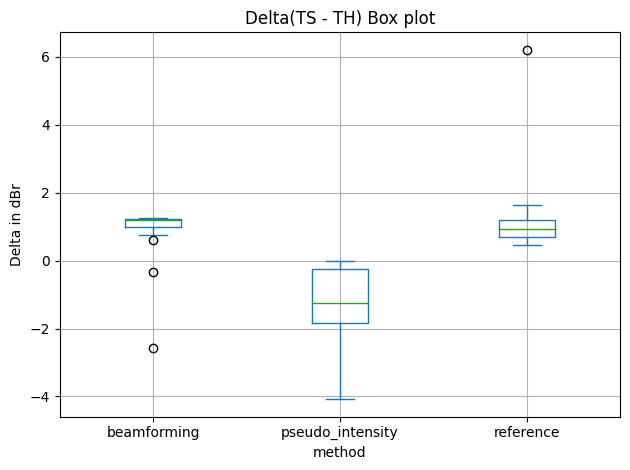

In [5]:
# plot and save results
 
TS_results.plot()
plt.title('TS (Top / Side)')
plt.xlabel('folder')
plt.ylabel('TS in dBr')
plt.grid()

plt.savefig('../out/TS.png')
plt.show()


TH_results.plot()
plt.title('TH (Top / Horizontal)')
plt.xlabel('folder')
plt.ylabel('TH in dBr')
plt.grid()

plt.savefig('../out/TH.png')
plt.show()


delta_results.plot()
plt.title('Delta(TS - TH) per folder')
plt.xlabel('folder')
plt.ylabel('Delta in dBr')
plt.grid()

plt.savefig('../out/Delta.png')
plt.show()


delta_results.plot(kind='box')
plt.title('Delta(TS - TH) Box plot')
plt.xlabel('method')
plt.ylabel('Delta in dBr')
plt.grid()
plt.tight_layout()
plt.savefig('../out/Delta_boxplot.png')
plt.show()
